<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_QuantumTeleportation_10__mkbahk_20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=a2088de888b0c911c5f7b14b99670ddb1d8e87205c37409d5ddd414a8118adb6
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 46.9 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [2]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-textbook
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from qiskit.quantum_info import Statevector

# Quantum Teleportation: q[0]의 상태값을 q[1]에 복사시키는 것
## 왜, 양자역할이론에서 복사불가정리(no-cloning theorem)에 의하여 Qubit간에 복사가 되지 않는데, 복사는 하는 효과를 낼 수 있음.

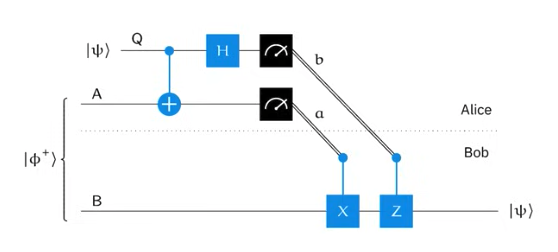

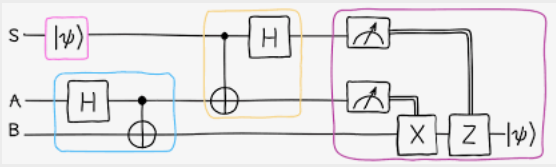

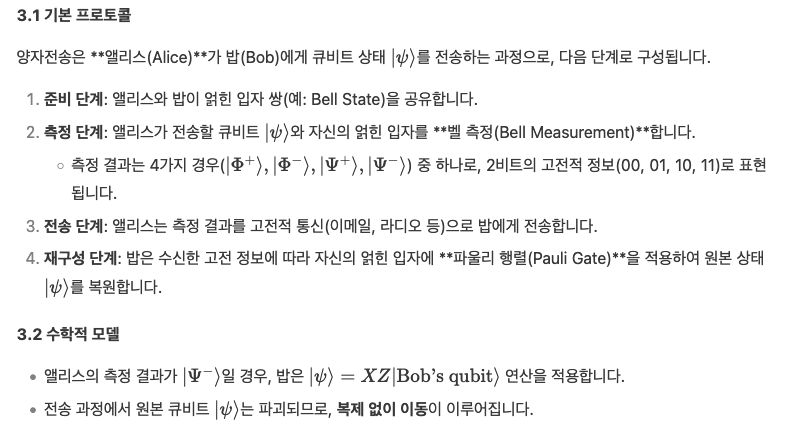

In [4]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[2])
circuit.reset(qreg_q[1])

circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])


circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])



circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.x(qreg_q[2]).c_if(creg_c[1], 1)
circuit.z(qreg_q[2]).c_if(creg_c[0], 1)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.measure(qreg_q[2], creg_c[2])


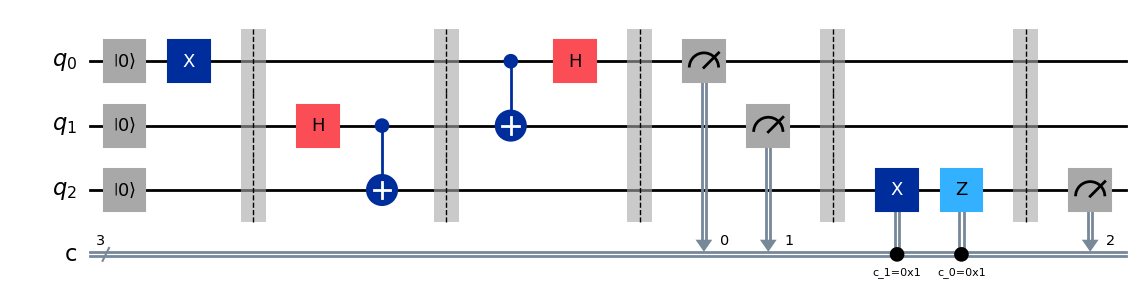

In [5]:
circuit.draw("mpl")

In [7]:
# 시뮬레이터로 실행
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, shots=1024).result()

In [8]:
creg_c[0]

Clbit(ClassicalRegister(3, 'c'), 0)

In [9]:
creg_c[1]

Clbit(ClassicalRegister(3, 'c'), 1)

Counts: {'100': 262, '110': 254, '111': 246, '101': 262}


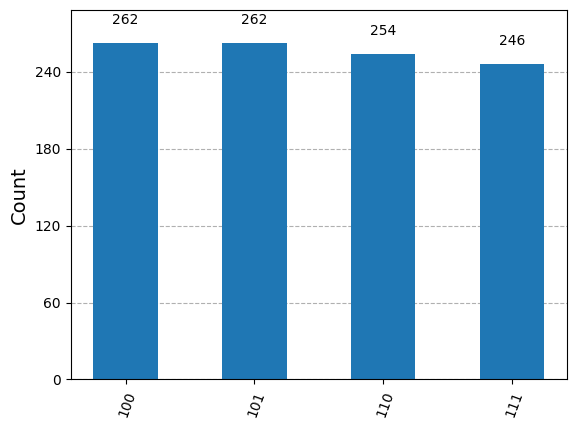

In [10]:
# 결과 출력
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts)

# 결과를 해석하는 법

# 큐빗 순서는 q[2], q[1], q[0] 순입니다. q[0] = 1 로 했으니, q[2] 가 1이 되어야 합니다.
# 위 결과 중 두번째와 "101"과 마지막 "111"의 경우  즉, 마지막 숫자가 "1", q[0]가 "1"인 경우는 반드시 첫번째 숫자는 "1"입니다. 마지막 숫자가 "0"인 경우는 무시하면 됨

In [15]:
new_counts = {}
for key, value in counts.items():
  if key.endswith('1'):
    new_counts[key] = value
  ###if
###for

print("New Counts:", new_counts)

New Counts: {'111': 246, '101': 262}


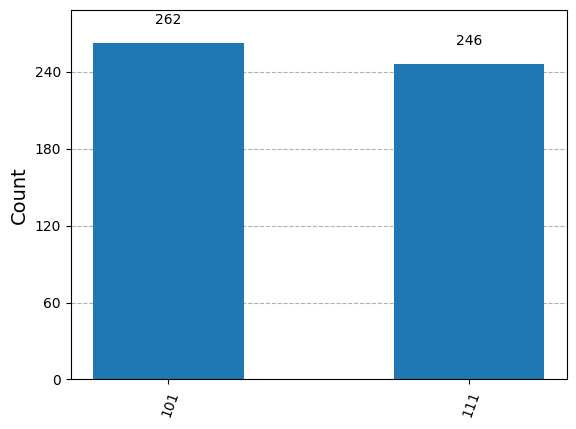

In [16]:
plot_histogram(new_counts)